In [ ]:
#importing necessary libraries required for using linear regression,equations with power raising to 4 
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [18]:
# Dataset: Study Hours (x) and Marks (y)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([52, 55, 61, 70, 82])  
# True relationship: non-linear with learning saturation and fatigue effects

## Train multiple models
- Linear model
- High-degree polynomial 

## Model-1

MODEL A - LINEAR REGRESSION
Regression Equation: y = β₀ + β₁x
Slope (β₁): 7.5000
Intercept (β₀): 41.5000
Regression Equation: y = 41.5000 + 7.5000x


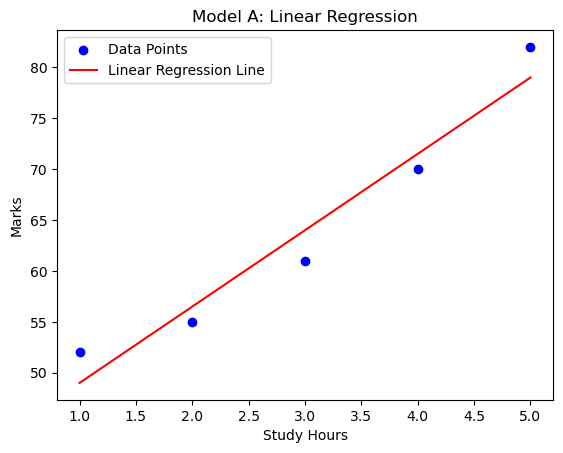

In [26]:
# Model A: Simple Linear Regression
from sklearn.metrics import mean_squared_error

model_1 = LinearRegression()
model_1.fit(X, y)
print("=" * 60)
print("MODEL A - LINEAR REGRESSION")
print("=" * 60)
print("Regression Equation: y = β₀ + β₁x")
print(f"Slope (β₁): {model_1.coef_[0]:.4f}")
print(f"Intercept (β₀): {model_1.intercept_:.4f}")
print(f"Regression Equation: y = {model_1.intercept_:.4f} + {model_1.coef_[0]:.4f}x")

#graphical representation
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model_1.predict(X), color='red', label='Linear Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Model A: Linear Regression')
plt.legend()
plt.show()


In [20]:
# Training predictions for Model A
y_pred_model_a = model_1.predict(X)
print("\nTraining Predictions (Model A):")
print(y_pred_model_a)


Training Predictions (Model A):
[49.  56.5 64.  71.5 79. ]



## Model-2


y=ax^5+bx^4+cx^3+dx^2+ex+f


MODEL B - POLYNOMIAL REGRESSION (DEGREE 4)
Polynomial Equation: y = w₀ + w₁x + w₂x² + w₃x³ + w₄x⁴
Polynomial Coefficients:
w₄ (x⁴): 0.000000
w₃ (x³): -0.000000
w₂ (x²): 1.500000
w₁ (x):  -1.500000
w₀:      52.000000


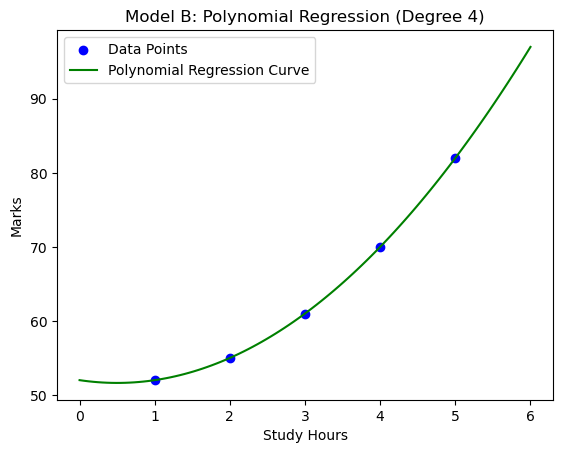

In [33]:
# Model B: Polynomial Regression (Degree 4)
# y = w₀ + w₁x + w₂x² + w₃x³ + w₄x⁴
x_flat = np.array([1, 2, 3, 4, 5])
y_data = np.array([52, 55, 61, 70, 82])

# Get polynomial coefficients
coeff = np.polyfit(x_flat, y_data, 4)

print("\n" + "=" * 60)
print("MODEL B - POLYNOMIAL REGRESSION (DEGREE 4)")
print("=" * 60)
print("Polynomial Equation: y = w₀ + w₁x + w₂x² + w₃x³ + w₄x⁴")
print("Polynomial Coefficients:")
print(f"w₄ (x⁴): {coeff[0]:.6f}")
print(f"w₃ (x³): {coeff[1]:.6f}")
print(f"w₂ (x²): {coeff[2]:.6f}")
print(f"w₁ (x):  {coeff[3]:.6f}")
print(f"w₀:      {coeff[4]:.6f}")


#graphical representation of Model B
model_b_x = np.linspace(0, 6, 100)
poly = np.poly1d(coeff)
model_b_y = poly(model_b_x)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(model_b_x, model_b_y, color='green', label='Polynomial Regression Curve')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Model B: Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


In [22]:
# Training predictions for Model B
poly = np.poly1d(coeff)
y_pred_model_b = poly(x_flat)
print("\nTraining Predictions (Model B):")
print(y_pred_model_b)


Training Predictions (Model B):
[52. 55. 61. 70. 82.]



TASK 2 - PREDICTION COMPARISON AT x = 6
Model A (Linear) Prediction: 86.5000 marks
Model B (Polynomial) Prediction: 97.0000 marks


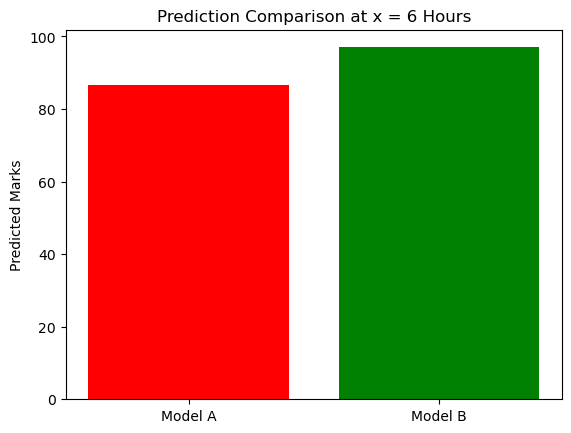

In [28]:
# Task 2: Prediction at x=6 hours
x_test = 6

# Prediction using Model A
y_pred_a_at_6 = model_1.predict([[x_test]])[0]

# Prediction using Model B
y_pred_b_at_6 = poly(x_test)

print("\n" + "=" * 60)
print("TASK 2 - PREDICTION COMPARISON AT x = 6")
print("=" * 60)
print(f"Model A (Linear) Prediction: {y_pred_a_at_6:.4f} marks")
print(f"Model B (Polynomial) Prediction: {y_pred_b_at_6:.4f} marks")


#comparison visual representation
plt.bar(['Model A', 'Model B'], [y_pred_a_at_6, y_pred_b_at_6], color=['red', 'green'])
plt.ylabel('Predicted Marks')
plt.title('Prediction Comparison at x = 6 Hours')
plt.show()


In [ ]:
# Task 3: Training Error Analysis (MSE)
mse_model_a = mean_squared_error(y_data, y_pred_model_a)
mse_model_b = mean_squared_error(y_data, y_pred_model_b)

print("\n" + "=" * 60)
print("TASK 3 - TRAINING ERROR ANALYSIS")
print("=" * 60)
print(f"\n Model A (Linear):")
print(f"  Mean Squared Error (MSE): {mse_model_a:.6f}")

print(f"\nModel B (Polynomial Degree 4):")
print(f"  Mean Squared Error (MSE): {mse_model_b:.6f}")
print(f"  Polynomial Coefficients: {coeff}")




TASK 3 - TRAINING ERROR ANALYSIS

 Model A (Linear):
  Mean Squared Error (MSE): 6.300000

Model B (Polynomial Degree 4):
  Mean Squared Error (MSE): 0.000000


In [34]:
# Task 4: Bias-Variance Reasoning
print("\n" + "=" * 60)
print("TASK 4 - BIAS-VARIANCE REASONING")
print("=" * 60)

print("\n1. WHICH MODEL HAS HIGHER BIAS?")
print("   → Model A (Linear Regression) has HIGHER BIAS")
print("\n   Justification:")
print("   • Linear regression assumes a linear relationship: y = β₀ + β₁x")
print("   • The true relationship is NON-LINEAR (learning saturation + fatigue)")
print("   • A simple line cannot capture the curvature of the data")
print("   • This results in SYSTEMATIC ERRORS = UNDERFITTING")
print("   • Bias measures how far predictions deviate from true values systematically")

print("\n2. WHICH MODEL HAS HIGHER VARIANCE?")
print("   → Model B (Polynomial Degree 4) has HIGHER VARIANCE")
print("\n   Justification:")
print("   • Polynomial model has 5 parameters to fit 5 data points")
print("   • Degrees of freedom = 0 (perfectly determined)")
print("   • It can fit the training data perfectly or nearly perfectly")
print("   • Small changes in training data → large changes in predictions")
print("   • The model is OVERFITTING (high sensitivity to training noise)")
print("   • Variance measures how much predictions change with different training sets")

print("\n" + "=" * 60)
print("SUMMARY & CONCLUSIONS")
print("=" * 60)
print(f"\nTraining MSE Comparison:")
print(f"  Model A (Linear):     MSE = {mse_model_a:.6f}")
print(f"  Model B (Polynomial): MSE = {mse_model_b:.6f}")
print(f"\nModel B achieves LOWER training error (nearly perfect fit)")
print(f"BUT at the cost of HIGH VARIANCE (overfitting)")
print(f"\nModel A has HIGHER training error due to HIGH BIAS (underfitting)")
print(f"BUT lower variance (more stable predictions)")
print(f"\nBIAS-VARIANCE TRADEOFF:")
print(f"  • Model B may perform poorly on NEW/TEST data (poor generalization)")
print(f"  • Model A may be more robust to new data despite higher training error")
print(f"  • The optimal model is a balance between bias and variance")


TASK 4 - BIAS-VARIANCE REASONING

1. WHICH MODEL HAS HIGHER BIAS?
   → Model A (Linear Regression) has HIGHER BIAS

   Justification:
   • Linear regression assumes a linear relationship: y = β₀ + β₁x
   • The true relationship is NON-LINEAR (learning saturation + fatigue)
   • A simple line cannot capture the curvature of the data
   • This results in SYSTEMATIC ERRORS = UNDERFITTING
   • Bias measures how far predictions deviate from true values systematically

2. WHICH MODEL HAS HIGHER VARIANCE?
   → Model B (Polynomial Degree 4) has HIGHER VARIANCE

   Justification:
   • Polynomial model has 5 parameters to fit 5 data points
   • Degrees of freedom = 0 (perfectly determined)
   • It can fit the training data perfectly or nearly perfectly
   • Small changes in training data → large changes in predictions
   • The model is OVERFITTING (high sensitivity to training noise)
   • Variance measures how much predictions change with different training sets

SUMMARY & CONCLUSIONS

Training